# **Conversion_rate Of e-Commerce Website**

#  Description
when we look at data from an e-commerce website. The site is very simple and has just 4 pages: The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page. From the home page, the user can perform a search and land on the search page. From the search page, if the user clicks on a product, user will get to the payment page, where user is asked to provide payment information in order to buy that product. If user does decide to buy, user ends up on the confirmation page .The goal is to calculate conversion rate  for an e-commerce website.



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob



## Loading Data

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
all_filenames

['user_table.csv',
 'payment_page_table.csv',
 'search_page_table.csv',
 'home_page_table.csv',
 'payment_confirmation_table.csv']

In [ ]:
#merging all csv files
com = pd.read_csv(all_filenames[0])
for f in  all_filenames:
  f1 = pd.read_csv(f)
  if f!='user_table.csv':
    com =com.merge( f1.rename(index=str,columns={'page':f.split('_table.csv')[0]}) ,how='left',on ='user_id',right_index=False, sort=True,
         suffixes=(' ', ''),  indicator=False,
         validate=None)

 


In [ ]:
com.

,user_id,date,device,sex,payment_page,search_page,home_page,payment_confirmation
0,17,2015-04-21,Desktop,Male,NaN,search_page,home_page,NaN
1,28,2015-04-29,Desktop,Male,NaN,NaN,home_page,NaN
2,37,2015-02-21,Mobile,Male,NaN,search_page,home_page,NaN
3,38,2015-03-23,Mobile,Female,payment_page,search_page,home_page,NaN
4,55,2015-02-01,Desktop,Male,NaN,NaN,home_page,NaN


In [ ]:
com['date'] = pd.to_datetime(com['date'])
com['date']=com['date'].dt.date
print(com['date'].describe())
print(com['date'].min())
print(com['date'].max())

count          90400
unique           120
top       2015-02-08
freq             877
Name: date, dtype: object
2015-01-01
2015-04-30


## Conversion rate for Female Users

120


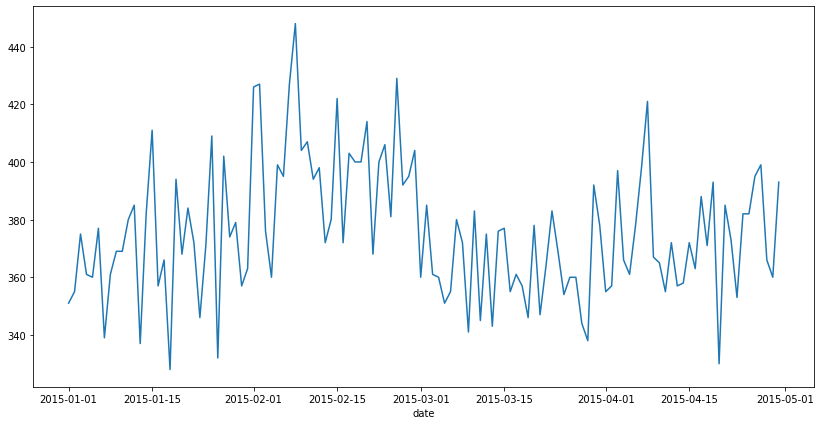

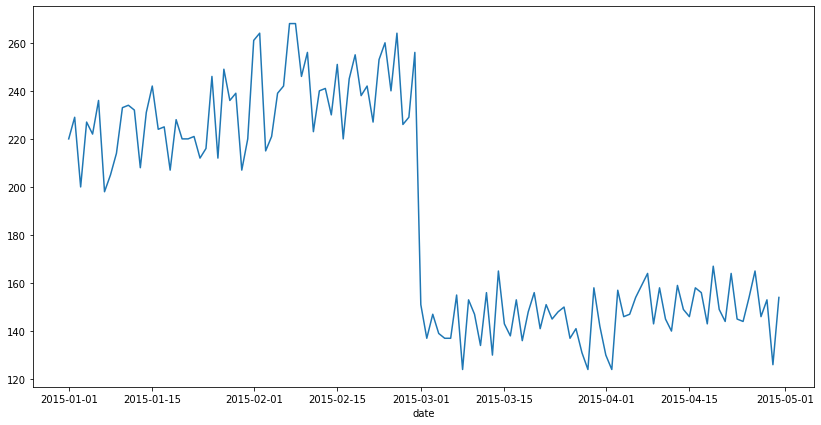

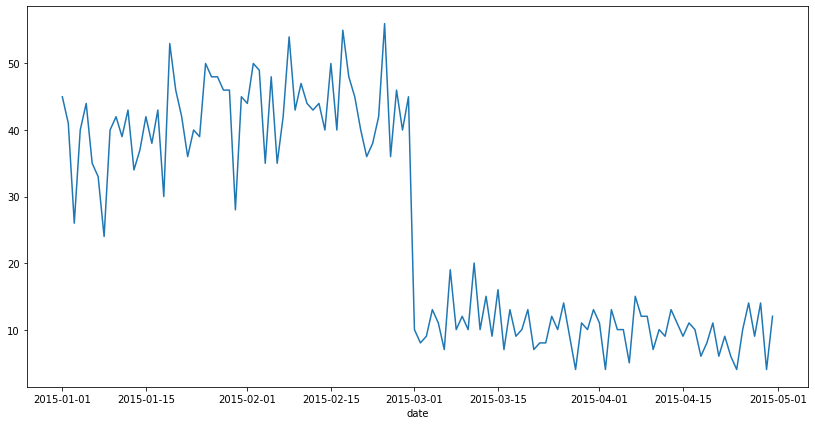

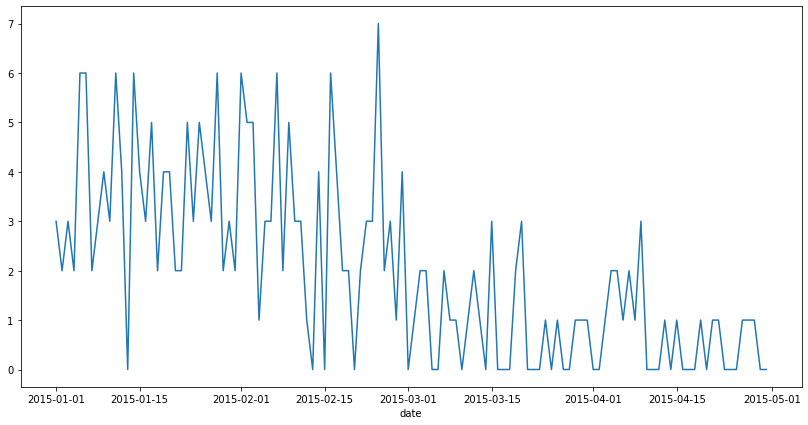

In [ ]:
date_groupbyF = com[(com.sex=='Female')].groupby('date').count()
plt.figure(figsize=(14,7))
date_groupbyF['home_page'].plot()
plt.figure(figsize=(14,7))
date_groupbyF['search_page'].plot()
plt.figure(figsize=(14,7))
date_groupbyF['payment_page'].plot()
plt.figure(figsize=(14,7))
date_groupbyF['payment_confirmation'].plot()

conversion rate for Female 0.005280350091713786


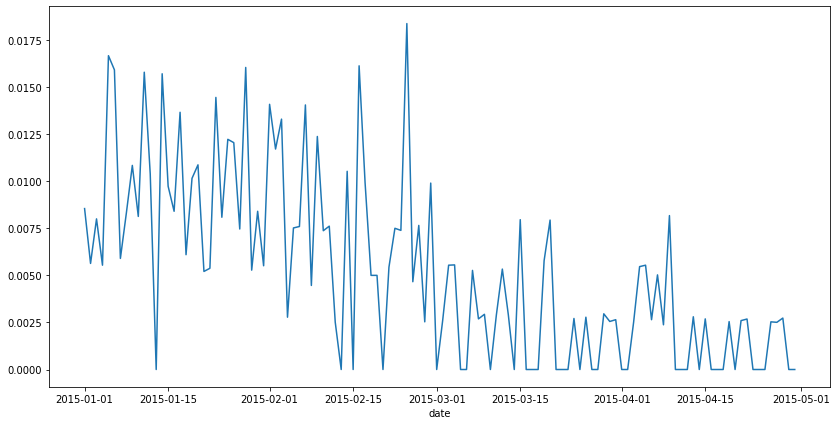

In [ ]:
plt.figure(figsize=(14,7))
(date_groupbyF['payment_confirmation']/date_groupbyF['home_page']).plot()
print('conversion rate for Female',(date_groupbyF['payment_confirmation']/date_groupbyF['home_page']).mean())


# Conversion rate for Male User

120
120


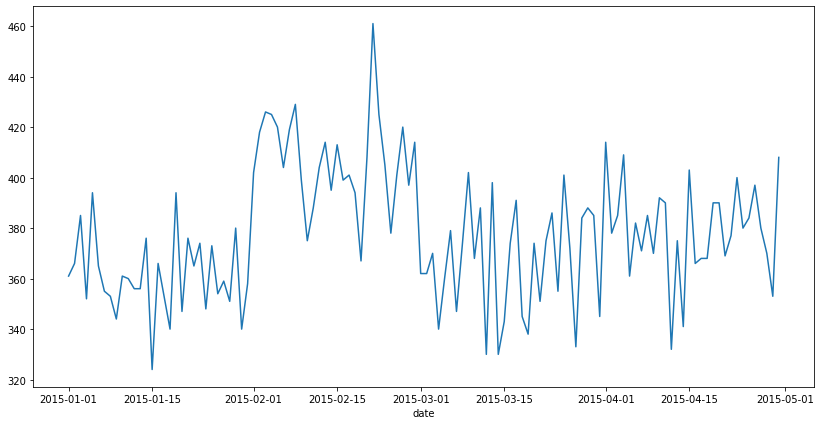

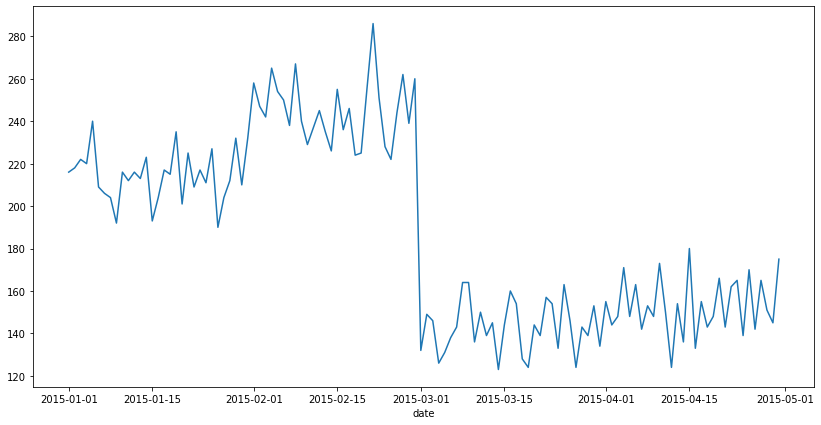

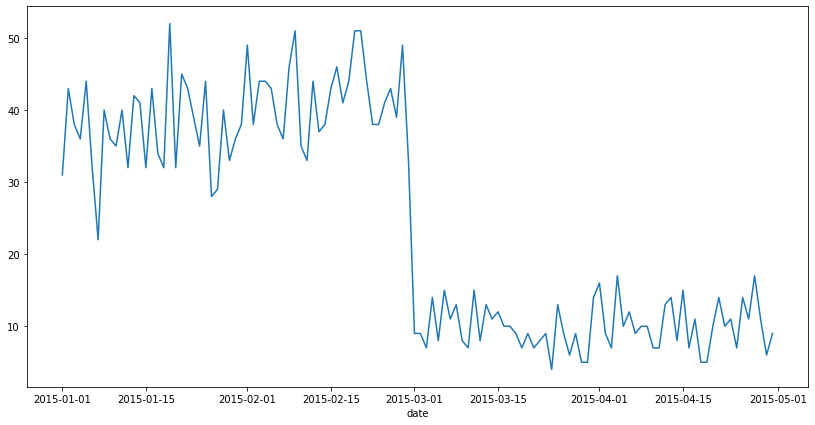

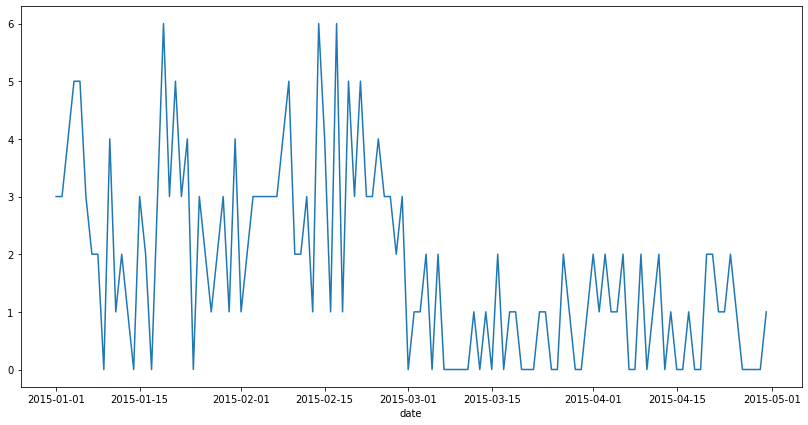

In [ ]:
date_groupbyM = com[(com.sex=='Male')].groupby('date').count()
plt.figure(figsize=(14,7))
date_groupbyM['home_page'].plot()
plt.figure(figsize=(14,7))
date_groupbyM['search_page'].plot()
plt.figure(figsize=(14,7))
date_groupbyM['payment_page'].plot()
plt.figure(figsize=(14,7))
date_groupbyM['payment_confirmation'].plot()

conversion rate for male 0.004607937413227532


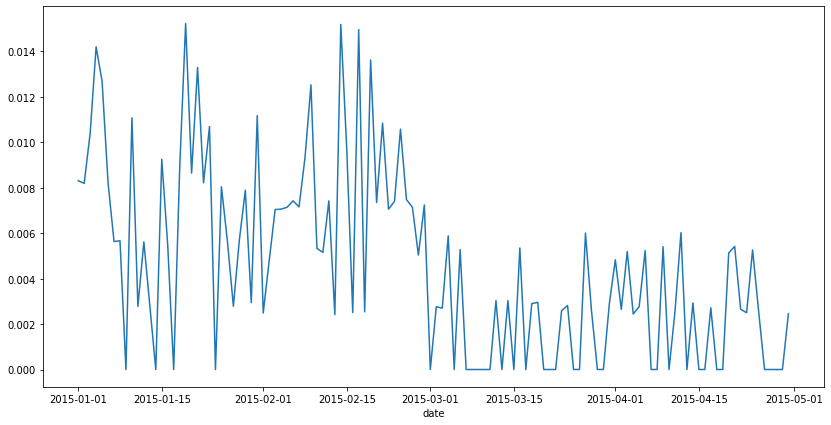

In [ ]:
plt.figure(figsize=(14,7))
(date_groupbyM['payment_confirmation']/date_groupbyM['home_page']).plot()
print('conversion rate for male',(date_groupbyM['payment_confirmation']/date_groupbyM['home_page']).mean())


# OverAll Conversion rate

In [ ]:
overall = com.groupby('date').count()
print((overall['payment_confirmation']/overall['home_page']).mean())

0.0049555116238386016
